In [1]:
import pandas as pd

# Example: comma-separated values in a .txt file
path = 'C:/Users/admin/Downloads/archive2/household_power_consumption.txt'
df = pd.read_csv(path, sep=';')
df

C:\Users\admin\AppData\Local\Temp\ipykernel_24220\3109899832.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [2]:
import numpy as np

cols_to_float = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
df[cols_to_float] = df[cols_to_float].replace('?', np.nan)
df[cols_to_float] = df[cols_to_float].astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   datetime64[ns]
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 142.5 MB


In [3]:
df_datetime = df.pivot_table( index='Date')
df_datetime

,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Time,Voltage
Date,,,,,,,,
2006-12-16,3.053475,13.082828,0.088187,0.000000,1.378788,12.439394,1900-01-01 20:41:30.000000256,236.243763
2006-12-17,2.354486,9.999028,0.156949,1.411806,2.907639,9.264583,1900-01-01 11:59:30.000000000,240.087028
2006-12-18,1.530435,6.421667,0.112356,0.738194,1.820139,9.734722,1900-01-01 11:59:30.000000000,241.231694
2006-12-19,1.157079,4.926389,0.104821,0.582639,5.279167,4.303472,1900-01-01 11:59:30.000000000,241.999313
2006-12-20,1.545658,6.467361,0.111804,0.000000,1.838889,9.765972,1900-01-01 11:59:30.000000000,242.308062
...,...,...,...,...,...,...,...,...
2010-11-22,1.417733,6.014167,0.098857,3.371528,1.465278,7.038889,1900-01-01 11:59:30.000000000,240.197118
2010-11-23,1.095511,4.674444,0.095451,1.299306,0.318056,5.285417,1900-01-01 11:59:30.000000000,240.575528
2010-11-24,1.247394,5.249583,0.091986,0.761111,1.977778,8.488889,1900-01-01 11:59:30.000000000,240.030965


In [4]:
df_datetime.loc['2006-12-16':'2010-11-26', 'Global_active_power']

Date
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Name: Global_active_power, Length: 1442, dtype: float64

In [5]:
print(df_datetime.loc['2006-12-16':'2010-11-26', 'Global_active_power'].max())

3.314851388888889


In [6]:
df_datetime.resample("W").last()

,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Time,Voltage
Date,,,,,,,,
2006-12-17,2.354486,9.999028,0.156949,1.411806,2.907639,9.264583,1900-01-01 11:59:30,240.087028
2006-12-24,1.770842,7.640417,0.104097,1.182639,3.529167,4.785417,1900-01-01 11:59:30,241.687437
2006-12-31,2.426525,10.199583,0.104758,0.000000,0.240972,4.515278,1900-01-01 11:59:30,239.896576
2007-01-07,1.699736,7.282639,0.170885,1.379861,5.678472,8.895833,1900-01-01 11:59:30,240.902486
2007-01-14,2.090213,8.968311,0.157832,1.234885,2.929117,9.016678,1900-01-01 11:59:30,238.821849
...,...,...,...,...,...,...,...,...
2010-10-31,1.025299,4.235139,0.144501,0.993056,0.470833,3.881250,1900-01-01 11:59:30,245.495278
2010-11-07,1.162372,4.965972,0.121511,0.712500,0.431250,4.821528,1900-01-01 11:59:30,238.436486
2010-11-14,1.415550,6.032361,0.141454,3.711111,0.381250,6.081944,1900-01-01 11:59:30,239.279799


In [7]:
df_datetime.resample("ME").last()

,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Time,Voltage
Date,,,,,,,,
2006-12-31,2.426525,10.199583,0.104758,0.000000,0.240972,4.515278,1900-01-01 11:59:30,239.896576
2007-01-31,1.641494,6.923611,0.129158,0.000000,4.131944,10.452778,1900-01-01 11:59:30,239.921132
2007-02-28,0.361649,1.528472,0.078731,0.000000,0.236111,1.370139,1900-01-01 11:59:30,242.159590
2007-03-31,2.437160,10.264722,0.160767,1.819444,5.352083,12.279167,1900-01-01 11:59:30,239.260771
2007-04-30,0.730594,3.239236,0.124510,2.107639,0.868056,1.963542,1900-01-01 11:59:30,234.870035
2007-05-31,0.651771,2.791806,0.089990,0.649306,0.331250,2.466667,1900-01-01 11:59:30,235.096528
2007-06-30,0.927301,3.971528,0.130801,2.117361,0.550000,5.816667,1900-01-01 11:59:30,240.011611
2007-07-31,0.564119,2.502500,0.101240,2.275694,0.000000,2.482639,1900-01-01 11:59:30,234.914813
2007-08-31,0.888765,3.788472,0.130039,0.833333,0.462500,6.068056,1900-01-01 11:59:30,239.985701


In [8]:
df_datetime.resample("QE").last()

,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Time,Voltage
Date,,,,,,,,
2006-12-31,2.426525,10.199583,0.104758,0.000000,0.240972,4.515278,1900-01-01 11:59:30,239.896576
2007-03-31,2.437160,10.264722,0.160767,1.819444,5.352083,12.279167,1900-01-01 11:59:30,239.260771
2007-06-30,0.927301,3.971528,0.130801,2.117361,0.550000,5.816667,1900-01-01 11:59:30,240.011611
2007-09-30,1.052979,4.452500,0.113603,0.975694,0.404167,7.100694,1900-01-01 11:59:30,240.064785
2007-12-31,1.539265,6.455000,0.101067,0.000000,2.400694,9.771528,1900-01-01 11:59:30,241.094792
2008-03-31,0.956646,4.005972,0.090875,0.757639,0.285417,6.518750,1900-01-01 11:59:30,242.727042
2008-06-30,0.558469,2.479167,0.131615,0.000000,0.361806,4.735417,1900-01-01 11:59:30,240.376118
2008-09-30,0.954865,4.024722,0.107703,0.693056,0.250000,5.149306,1900-01-01 11:59:30,240.583771
2008-12-31,1.364019,5.687639,0.089772,2.065972,0.170833,8.236111,1900-01-01 11:59:30,243.296618


array([[<Axes: title={'center': 'Global_active_power'}>,
        <Axes: title={'center': 'Global_intensity'}>,
        <Axes: title={'center': 'Global_reactive_power'}>],
       [<Axes: title={'center': 'Sub_metering_1'}>,
        <Axes: title={'center': 'Sub_metering_2'}>,
        <Axes: title={'center': 'Sub_metering_3'}>],
       [<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Voltage'}>, <Axes: >]], dtype=object)

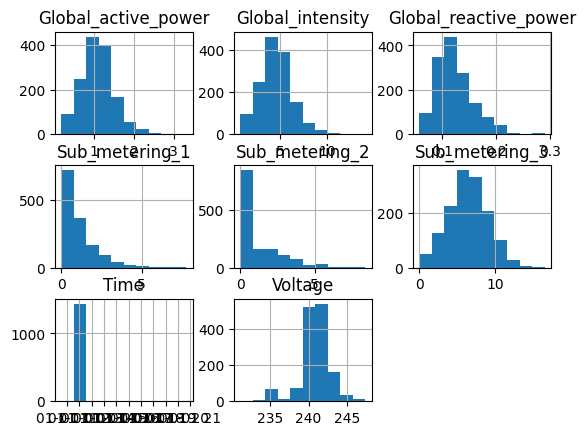

In [9]:
df_datetime.hist()

<Axes: >

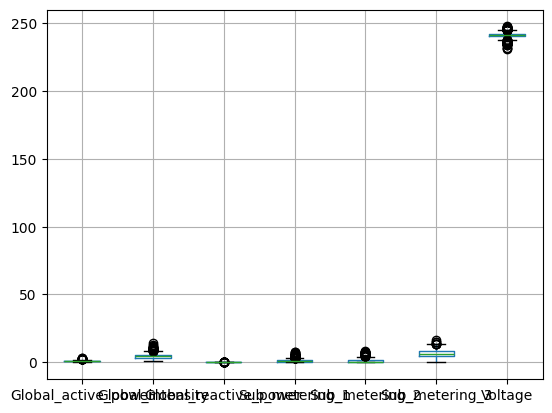

In [10]:
df_datetime.boxplot()

<Axes: title={'center': 'Global_active_power'}, xlabel='Date'>

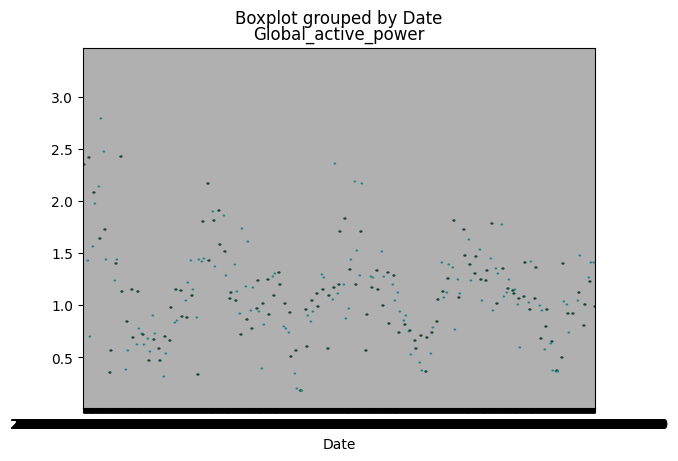

In [11]:
df_datetime.boxplot(column='Global_active_power', by='Date')

<Axes: >

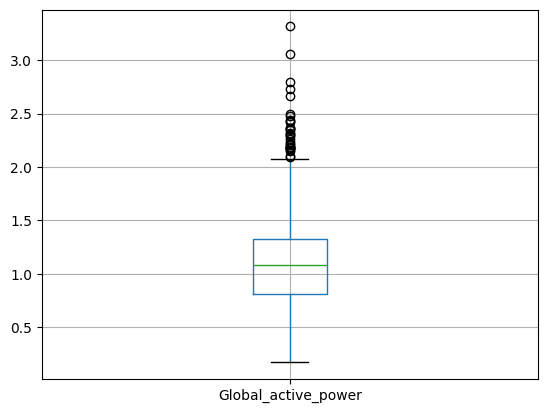

In [12]:
df_datetime.boxplot(column='Global_active_power')